In [ ]:
from PIL import Image, ImageDraw, ImageFilter
from IPython.core.display import display, HTML

# Capstone Project - Car accident severity

## Introduction<br>

**Background**<br>
Deaths and injuries by road crash are highly concerning issues, with 1.35 million and 50 million people affected around the world, respectively. 

In 2018, the United States, being one of the busiest countries with nearly 280 million vehicles in operation and more than 227.5 million people holding a valid driving license, counted more than 38,000 deaths and 12 million vehicles involved in road crashes. 

Road crashes are the leading cause of deaths in the U.S. for people aged 1-54. An additional 4.4 million are injured seriously enough to require medical attention. According to OECD’s 2019 U.S. annual report, the economic costs of traffic crashes represents 1.6% of the GDP. When quality of life valuations are considered, the total value of societal harm from motor vehicle crashes is nearly 6% of GDP.


**Problem**<br>
In Seattle alone in 2018, the dataset provided by Seattle Department of Transportation (SDOT) counts over 3,500 injuries and 7,000 property-damage-only collisions in the same year. Thus, it is absolutely reasonable that various stakeholders would wish to minimize such numbers, and this project addresses the request to choose the suitable predictive model(s) of the possibility and severity of road crashes.

While potential stakeholders include:<br>
* Drivers, pedestrians, bicyclists, others using transportation services
* Transportation service providers
* Hospitals
* Government bodies, e.g. EMS, SPD, School Board, DoTransportation, DoHealth
* Other local and federal government bodies (policy-making side, social welfare-side, etc.)
* Insurers
* Corporations and employees
* Nonprofit organizations

A question paused for this assignment is how we can predict road crashes when one is about to set off to drive toward his/her destination. To put it in a broader and socially beneficial context, I am setting **the goal of this project on finding**, if any, the determining variables causing crashes and **the most suitable predictive modeling** for the responsible parties such as SDOT or SPD to be able to alert and/or educate drivers sufficiently to reduce the number of crashes. I also thought of predicting the severity of crashes but have decided not to pursue it at this point as people are not likely to decide whether to drive depending on the possible severity of a crash (not likely to decide, like "oh well, it'll just be a property-damege-only crash or minor injury I will get, so I'm just gonna go").


### Data Description



Thus I have expected the output should be supervised, binary-labeled classifications.<br>
Following is a list of datasets I have looked into, and decided how or whether to use them for the defined goal:<br>
**1. Collison records (SDOT)** provided by Seattle Department of Transportation (SDOT) found at [Kaggle](https://www.kaggle.com/jonleon/seattle-sdot-collisions-data), of more than 221,000 records over the period of 2004 - 2019.<br>
**2. Traffic Flow Counts** [ArcGis](https://www.esri.com/en-us/home) datasets found at [Seattle GeoData](https://data-seattlecitygis.opendata.arcgis.com/).<br>
**3. Collision records (WSP)** provided by [Washinton State Patrol](https://www.wsp.wa.gov/driver/collision-records/) which offers per-involved-party (driver/pedestrian/pedcyclist) detail records while 1. provides per-crash-a-record summary.<br>
**4. Weather data** available at [NOAA](https://search.usa.gov/search?utf8=%E2%9C%93&affiliate=ncdc&query=seattle).<br>
(5. Negative sample dataset - this will be explained in the data preparation section.)                              

In the following I began with 1. SDOT collision records, then others.<br>


#### Data Understanding
##### Dataset: SDOT Collision records

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline


In [3]:
#Read the dataset downloaded from Kaggle("https://www.kaggle.com/jonleon/seattle-sdot-collisions-data?select=Collisions.csv". Dataset has been downloaded from the website and uploaded here as below.
sdot = pd.read_csv('SDOT_Collisions.csv')
sdot.head(3)


,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,...,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,...,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N


In [4]:
from IPython.display import display
pd.options.display.max_columns = None           # want all the columns displayed
display(sdot)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.386772,47.564720,1,326234,327734,E984735,Matched,Intersection,31893.0,CALIFORNIA AVE SW AND SW GENESEE ST,,NaN,2,Injury Collision,Pedestrian,2,1,0,1,1,0,0,2019/11/20 00:00:00+00,11/20/2019 10:25:00 AM,At Intersection (intersection related),24.0,MOTOR VEHCILE STRUCK PEDESTRIAN,NaN,N,Clear,Dry,Daylight,Y,NaN,NaN,2,Vehicle turning left hits pedestrian,0,0,N
1,-122.341806,47.686934,2,326246,327746,E985430,Matched,Intersection,24228.0,STONE AVE N AND N 80TH ST,,NaN,2,Injury Collision,Angles,4,0,0,2,2,0,0,2019/11/18 00:00:00+00,11/18/2019 5:01:00 PM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Raining,Wet,Dark - Street Lights On,NaN,NaN,NaN,10,Entering at angle,0,0,N
2,-122.374899,47.668666,3,329254,330754,EA16720,Matched,Block,NaN,NW MARKET ST BETWEEN 14TH AVE NW AND 15TH AVE NW,,NaN,1,Property Damage Only Collision,Sideswipe,4,0,0,3,0,0,0,2020/02/20 00:00:00+00,2/20/2020 8:42:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,11,From same direction - both going straight - bo...,0,0,N
3,-122.300758,47.683047,4,21200,21200,1227970,Matched,Intersection,24661.0,25TH AVE NE AND NE 75TH ST,NaN,NaN,1,Property Damage Only Collision,Left Turn,2,0,0,2,0,0,0,2004/06/08 00:00:00+00,6/8/2004,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,4160038.0,NaN,28,From opposite direction - one left turn - one ...,0,0,N
4,-122.313053,47.567241,5,17000,17000,1793348,Unmatched,Block,NaN,S DAKOTA ST BETWEEN 15TH AVE S AND 16TH AVE S,NaN,NaN,0,Unknown,NaN,0,0,0,0,0,0,0,2004/10/15 00:00:00+00,10/15/2004,Mid-Block (but intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,NaN,NaN,NaN,NaN,NaN,4289025.0,NaN,NaN,NaN,0,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221261,-122.329060,47.605233,221262,318579,320079,E909186,Matched,Block,NaN,6TH AVE BETWEEN CHERRY ST AND COLUMBIA ST,,NaN,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019/03/07 00:00:00+00,3/7/2019 2:00:00 PM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Unknown,Unknown,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221262,-122.314961,47.523468,221263,318368,319868,3780990,Matched,Block,NaN,14TH AVE S BETWEEN S CONCORD ST AND S HENDERSO...,,NaN,2,Injury Collision,Rear Ended,2,0,0,2,1,0,0,2019/04/26 00:00:00+00,4/26/2019 9:59:00 AM,Mid-Block (not related to intersection),14.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
221263,-122.334203,47.575576,221264,318948,320448,E920056,Matched,Intersection,31379.0,1ST AVE S AND S HANFORD ST,,NaN,1,Property Damage Only Collision,Right Turn,2,0,0,2,0,0,0,2019/05/09 00:00:00+00,5/9/2019 7:00:00 AM,At Intersection (intersection related),11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,16,From same direction - one right turn - one str...,0,0,N
221264,-122.310259,47.594214,221265,319956,321456,3795268,Matched,Block,NaN,RAINIER AVE S BETWEEN S CHARLES N ST AND S CHA...,,NaN,1,Property Damage Only Collision,Angles,3,0,0,2,0,0,0,2019/06/08 00:00:00+00,6/8/2019 12:42:00 PM,Driveway Junction,11.0,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT E

Attribute Information is [here](https://www.seattle.gov/Documents/Departments/SDOT/GIS/Collisions_OD.pdf)

In [5]:
sdot['ADDRTYPE'].value_counts().to_frame('count')


,count
Block,144857
Intersection,71823
Alley,874


In [6]:
sdot['LOCATION'].value_counts().to_frame('count')


,count
BATTERY ST TUNNEL NB BETWEEN ALASKAN WY VI NB AND AURORA AVE N,298
N NORTHGATE WAY BETWEEN MERIDIAN AVE N AND CORLISS AVE N,296
BATTERY ST TUNNEL SB BETWEEN AURORA AVE N AND ALASKAN WY VI SB,291
AURORA AVE N BETWEEN N 117TH PL AND N 125TH ST,282
6TH AVE AND JAMES ST,276
...,...
NW CANAL ST BETWEEN 1ST AVE NW AND NW CANAL ST,1
SW MYRTLE ST BETWEEN 23RD AVE SW AND 24TH AVE SW,1
S DAWSON ST BETWEEN 44TH AVE S AND BOWEN PL S,1
BURKE GILMAN TRL BETWEEN NE 112TH ST AND LAKESIDE PL NE,1


In [7]:
sdot.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221266 entries, 0 to 221265
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                213797 non-null  float64
 1   Y                213797 non-null  float64
 2   OBJECTID         221266 non-null  int64  
 3   INCKEY           221266 non-null  int64  
 4   COLDETKEY        221266 non-null  int64  
 5   REPORTNO         221266 non-null  object 
 6   STATUS           221266 non-null  object 
 7   ADDRTYPE         217554 non-null  object 
 8   INTKEY           71823 non-null   float64
 9   LOCATION         216680 non-null  object 
 10  EXCEPTRSNCODE    100863 non-null  object 
 11  EXCEPTRSNDESC    11775 non-null   object 
 12  SEVERITYCODE     221265 non-null  object 
 13  SEVERITYDESC     221266 non-null  object 
 14  COLLISIONTYPE    194767 non-null  object 
 15  PERSONCOUNT      221266 non-null  int64  
 16  PEDCOUNT         221266 non-null  int6

In [8]:
#Frequency per Severity
sdot['SEVERITYDESC'].value_counts().to_frame('count')


,count
Property Damage Only Collision,137485
Injury Collision,58698
Unknown,21636
Serious Injury Collision,3098
Fatality Collision,349


In [9]:
sdot['JUNCTIONTYPE'].value_counts().to_frame('count')


,count
Mid-Block (not related to intersection),101579
At Intersection (intersection related),69117
Mid-Block (but intersection related),24402
Driveway Junction,11495
At Intersection (but not related to intersection),2495
Ramp Junction,190
Unknown,21


In [10]:
sdot['ST_COLDESC'].value_counts().to_frame('count')


,count
One parked--one moving,44842
Entering at angle,35469
From same direction - both going straight - one stopped - rear-end,26159
Fixed object,14120
From same direction - both going straight - both moving - sideswipe,12944
...,...
Railway Vehicle Strikes Pedalcyclist,3
Vehicle Strikes All Other Non-Domestic Animal,2
"Non-domestic animal (deer, bear, elk, etc)",1
Vehicle Strikes Deer,1


In [11]:
sdot['COLLISIONTYPE'].value_counts().to_frame('count')


,count
Parked Car,48455
Angles,35469
Rear Ended,34624
Other,24528
Sideswipe,18855
Left Turn,14082
Pedestrian,7654
Cycles,5911
Right Turn,3008
Head On,2181


In [12]:
import datetime as dt

sdot['INCDATE'] = pd.to_datetime(sdot['INCDATE'])
sdot['INCDTTM'] = pd.to_datetime(sdot['INCDTTM'])
sdot['dayofweek'] = sdot['INCDTTM'].dt.dayofweek
sdot['weekend'] = sdot['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
sdot['week_number'] = sdot['INCDTTM'].dt.week
sdot['month'] = sdot['INCDTTM'].dt.month
sdot['year'] = sdot['INCDTTM'].dt.year
sdot['hour'] = sdot['INCDTTM'].dt.hour  #note: 0 contains unknown


##### Following contains visualization for observations on volume trend, seasonality, correlation, and data pre-processing.

<Figure size 432x288 with 0 Axes>

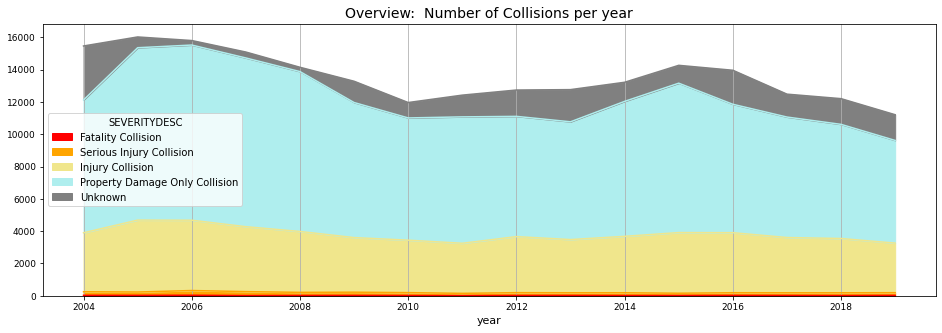

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]

yr = (yr_0.groupby(['SEVERITYDESC'])['year'].value_counts().unstack(level=0))
yr = yr[['Fatality Collision', 'Serious Injury Collision', 'Injury Collision', 'Property Damage Only Collision', 'Unknown']]

fig = plt.figure()
yr.plot(kind='area', figsize=(16,5), stacked=True, color=('red','orange','khaki','paleturquoise','gray'), fontsize=9)
plt.gca().xaxis.grid(True)

plt.title('Overview:  Number of Collisions per year', fontsize=14)
plt.xlabel('year', fontsize=11)

plt.show()


##### Observation_1. After the increase in 2014 - 2015, the number has been declining.

Furthermore, I wanted to see if there is any seasonality.

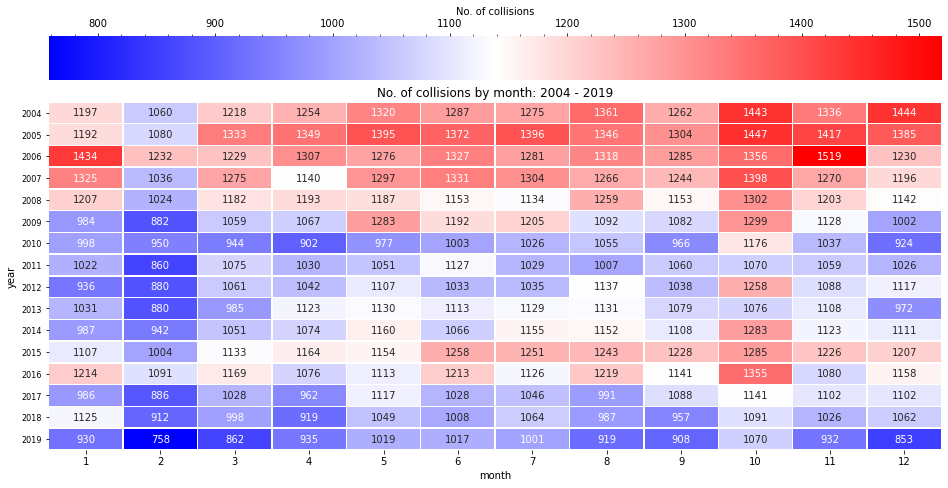

In [14]:
yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
yr_0.set_index(yr_0['INCDATE'], drop=True, append=False, inplace=False)

#Creating heatmaps by-month, by-week heatmaps
import seaborn as sns
from natsort import natsorted

#per-Month
sdotcal = pd.DataFrame(yr_0.groupby(['year'])['month'].value_counts())
sdotcal.columns = ['collisions']
sdotcal.reset_index(inplace=True)

sdotcal.month =pd.Categorical(sdotcal.month,categories=natsorted(sdotcal.month.unique()),ordered=True)

smx1 = pd.pivot_table(sdotcal, values='collisions', index='year', columns='month')

fig, ax = plt.subplots(figsize=(16, 8))
smx1p = sns.heatmap(smx1, annot=True, fmt="d", linewidths=.5, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx1p.set_yticklabels(smx1p.get_ymajorticklabels(), fontsize = 8)
smx1p.set_xticklabels(smx1p.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by month: 2004 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)


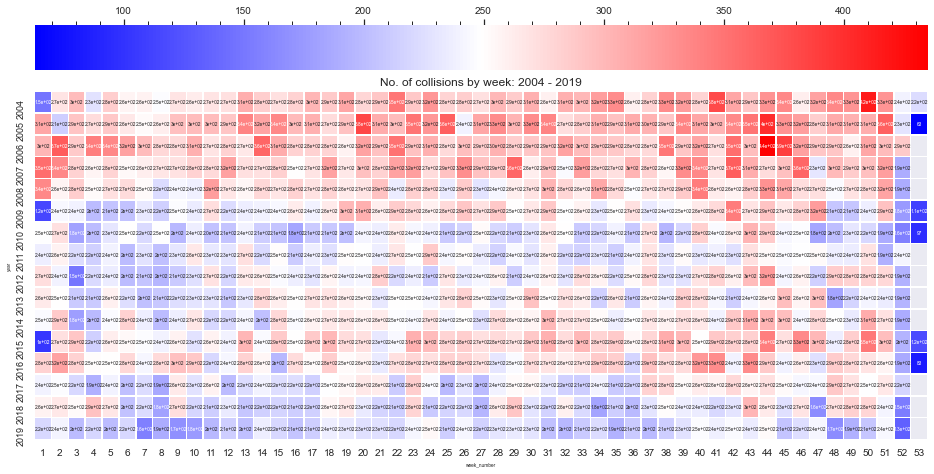

In [15]:
#per-Week
sdotcal1 = pd.DataFrame(yr_0.groupby(['year'])['week_number'].value_counts())
sdotcal1.columns = ['collisions']
sdotcal1.reset_index(inplace=True)

sdotcal1.week_number =pd.Categorical(sdotcal1.week_number,categories=natsorted(sdotcal1.week_number.unique()),ordered=True)

smx2 = pd.pivot_table(sdotcal1, values='collisions', index='year', columns='week_number')

sns.set(font_scale=0.4)
fig, ax = plt.subplots(figsize=(16, 8))
smx2p = sns.heatmap(smx2, annot=True, linewidths=.5, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top"))
smx2p.set_yticklabels(smx2p.get_ymajorticklabels(), fontsize = 9)
smx2p.set_xticklabels(smx2p.get_xmajorticklabels(), fontsize = 10)
cbar2 = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by week: 2004 - 2019', fontsize=12) 

cbar2 = ax.collections[0].colorbar
cbar2.ax.tick_params(labelsize=10)

There is decrease in volume over the past recent years except 2014-2015, thus below zooms in for more recent years, 2014 - 2019.

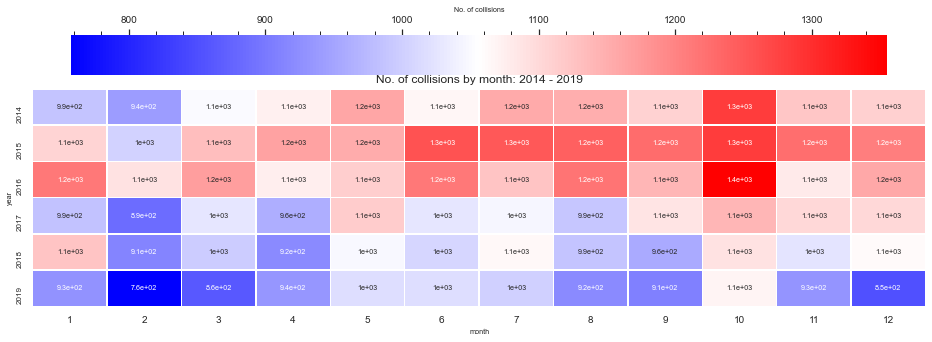

In [16]:
#per-Month
yr_5 = sdot.loc[sdot['year'].between(2014, 2019, inclusive=True)]
sdotcal5 = pd.DataFrame(yr_5.groupby(['year'])['month'].value_counts())
sdotcal5.columns = ['collisions']
sdotcal5.reset_index(inplace=True)

sdotcal5.month =pd.Categorical(sdotcal5.month,categories=natsorted(sdotcal5.month.unique()),ordered=True)

smx5 = pd.pivot_table(sdotcal5, values='collisions', index='year', columns='month')

sns.set(font_scale=0.6)
fig, ax = plt.subplots(figsize=(16, 5))
smx5p = sns.heatmap(smx5, annot=True, linewidths=.4, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx5p.set_yticklabels(smx5p.get_ymajorticklabels(), fontsize = 8)
smx5p.set_xticklabels(smx5p.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by month: 2014 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

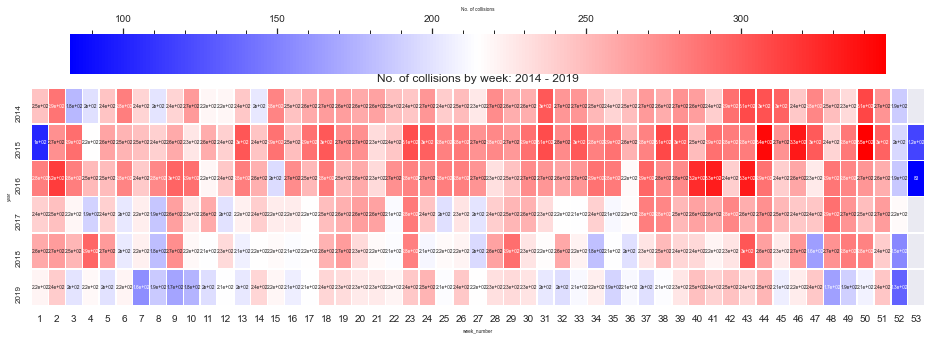

In [17]:
#per-Week
sdotcal5w = pd.DataFrame(yr_5.groupby(['year'])['week_number'].value_counts())
sdotcal5w.columns = ['collisions']
sdotcal5w.reset_index(inplace=True)

sdotcal5w.week_number =pd.Categorical(sdotcal5w.week_number,categories=natsorted(sdotcal5w.week_number.unique()),ordered=True)

smx5w = pd.pivot_table(sdotcal5w, values='collisions', index='year', columns='week_number')
sns.set(font_scale=0.4)
fig, ax = plt.subplots(figsize=(16, 5))
smx5wp = sns.heatmap(smx5w, annot=True, linewidths=.4, ax=ax, cmap='bwr', cbar_kws = dict(use_gridspec=False, location="top",
                            label='No. of collisions'))
smx5wp.set_yticklabels(smx5wp.get_ymajorticklabels(), fontsize = 8)
smx5wp.set_xticklabels(smx5wp.get_xmajorticklabels(), fontsize = 10)
cbar = ax.collections[0].colorbar.minorticks_on()
ax.set_title('No. of collisions by week: 2014 - 2019', fontsize=12) 

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)

##### Observation_2. There appears to be no apparent seasonality, especially over the recent years.

Not every year is the same. There is no significant seasonality to be considered.<br>
Now we look at the circumstancial conditions.

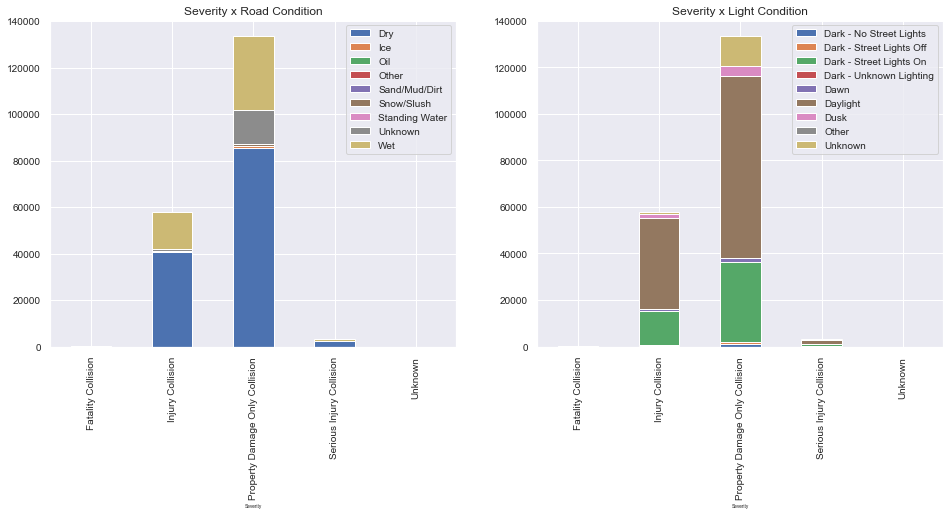

In [18]:
from matplotlib import gridspec

fig = plt.figure()
p1 = (sdot.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
p2 = (sdot.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

p1.plot(kind='bar', figsize=(16,6), ax=ax0, stacked=True, fontsize=10)
ax0.set_title('Severity x Road Condition', fontsize=12)
ax0.set_xlabel('Severity')
ax0.legend(fontsize=10, loc='upper right')

p2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10)
ax1.set_title('Severity x Light Condition', fontsize=12)
ax1.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper right')

plt.show()


##### It is more appearant without Property-only and Unknown

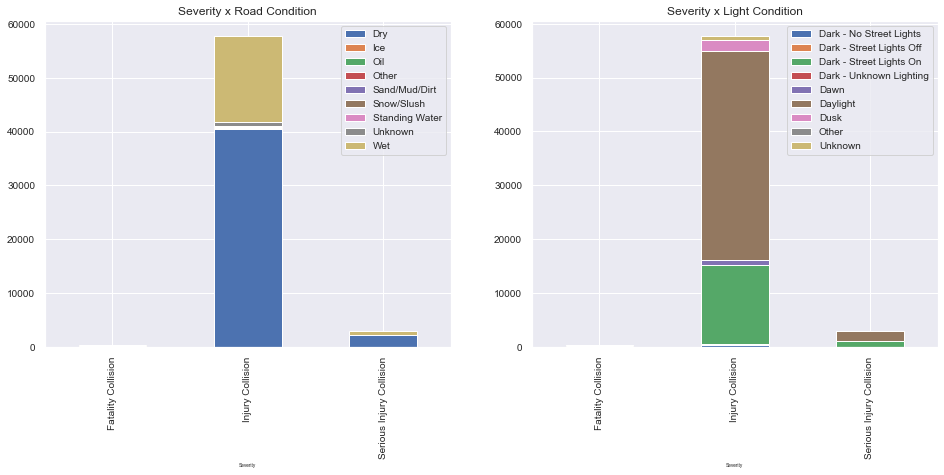

In [19]:
sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10)
ax0.set_title('Severity x Road Condition', fontsize=12)
ax0.set_xlabel('Severity')
ax0.legend(fontsize=10, loc='upper right')

pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10)
ax1.set_title('Severity x Light Condition', fontsize=12)
ax1.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper right')

plt.show()


##### It is so, with Fatality and Serious Injury only

No handles with labels found to put in legend.


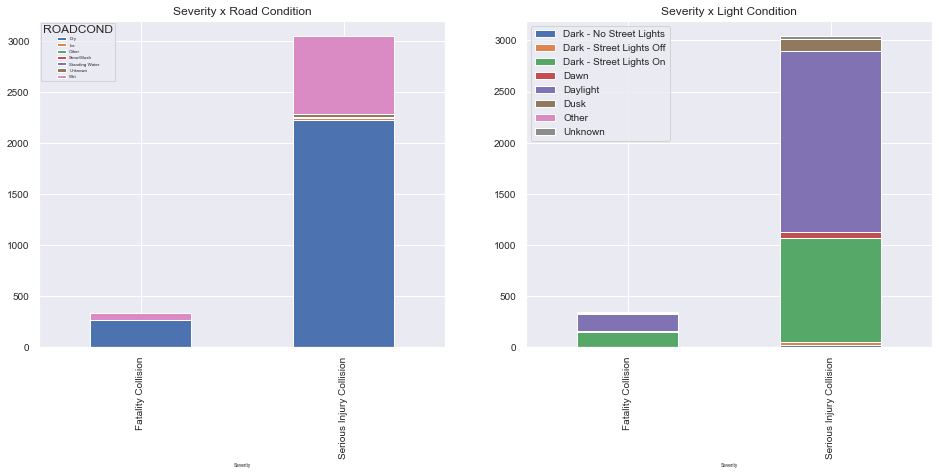

In [20]:
sdot_f = sdot.loc[sdot['SEVERITYDESC'].isin(['Fatality Collision','Serious Injury Collision'])]

fig = plt.figure()
pf1 = (sdot_f.groupby(['ROADCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))
pf2 = (sdot_f.groupby(['LIGHTCOND'])['SEVERITYDESC'].value_counts().unstack(level=0))

ax0 = fig.add_subplot(1, 2, 1) 
ax1 = fig.add_subplot(1, 2, 2) 

pf1.plot(kind='bar', figsize=(10,6), ax=ax0, stacked=True, fontsize=10)
ax0.set_title('Severity x Road Condition', fontsize=12)
ax0.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper left')

pf2.plot(kind='bar', figsize=(16,6), ax=ax1, stacked=True, fontsize=10)
ax1.set_title('Severity x Light Condition', fontsize=12)
ax1.set_xlabel('Severity')
ax1.legend(fontsize=10, loc='upper left')

plt.show()


So far as above, majority of crashes happen on dry roads and in daylight.<br>
Now we look in to see whether there is any the correlation between variables that may provide any hint where else I could probe further.

In [21]:
sdot['INATTENTIONIND'].replace(to_replace=['Y','NaN'], value=[1,0], inplace=True)
sdot['UNDERINFL'].replace(to_replace=['N','Y','NaN'], value=['0','1','0'], inplace=True)
sdot['SPEEDING'].replace(to_replace=['N','Y','NaN'], value=['0','1','0'], inplace=True)
sdot.fillna(0, inplace=True)

In [22]:
sdot['UNDERINFL'].value_counts().to_frame('count')


,count
0,185158
0,26479
1,9629


In [23]:
sdot.loc[(sdot['UNDERINFL']=="0"), 'UNDERINFL'] = 0


Text(0.5, 1.0, 'All collisions')

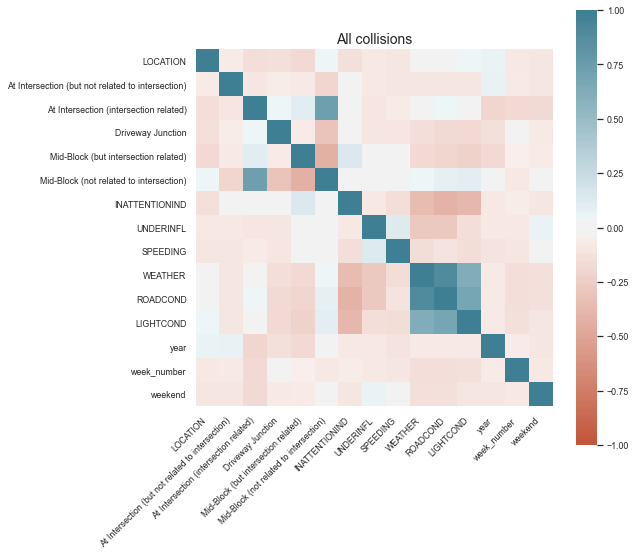

In [24]:
#Check correlation with junctiontype details
yr_0 = sdot.loc[sdot['year'].between(2004, 2019, inclusive=True)]
yr_0 = pd.concat([yr_0,pd.get_dummies(yr_0['JUNCTIONTYPE'])], axis=1)  #one hot encoding

from sklearn.preprocessing import LabelEncoder
corrdf = yr_0[['LOCATION','At Intersection (but not related to intersection)','At Intersection (intersection related)', 'Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'year', 'week_number', 'weekend']]

# Categorical -> Numerical
corrdf2 = corrdf.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

corr_p = sns.heatmap(
    corrdf2.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr_p.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr_p.set_title('All collisions', fontsize=14)

Text(0.5, 1.0, 'Injuries')

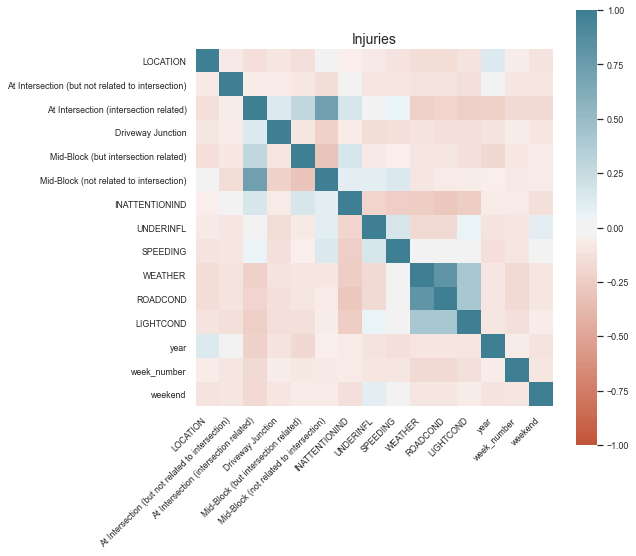

In [25]:
#limiting to injury-involved crashes 

#yr_0 is for 2010-2019
cor_inj = yr_0.loc[yr_0['SEVERITYDESC'].isin(['Fatality Collision','Injury Collision','Serious Injury Collision'])]

cor_inj2 = cor_inj[['LOCATION','At Intersection (but not related to intersection)','At Intersection (intersection related)', 'Driveway Junction','Mid-Block (but intersection related)','Mid-Block (not related to intersection)', 'INATTENTIONIND', 'UNDERINFL', 'SPEEDING', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'year', 'week_number', 'weekend']]
cor_inj2N = cor_inj2.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)


sns.set(font_scale=0.8)
fig, ax = plt.subplots(figsize=(8, 8))

corr_p2 = sns.heatmap(
    cor_inj2N.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
corr_p2.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
corr_p2.set_title('Injuries', fontsize=14)

##### Observation_3. Weather, road and light conditions are correlative among themselves but do not specifically point out any other possible correlation.
<br>


Thus far we do not see particular patterns such as seasonality or variables that are so distinctive as the causes of crashes. One more area we could explore is personal attributes, which has led to finding the WSP collision records that contains age, gender, vehicle details and more.<br>
I have separated Understanding WSP dataset in another notebook (link below - to update) as it involves a much larger dataset and also ended in deciding not to use it.


#### Dataset: WSP Collision records
In a separate notebook

<br>

#### Datasets: Weather data (NOAA) and Traffic Flow Counts datasets<br>
For the above observations, we are not going to go further with the weather data.<br> 
As for the Traffic Flow Counts data, while it should provide the perfect negative crash dataset, the number of negative records could be hypothetically as many as 13.5 billion, that would make the positive data and negative data significantly unbalanced and prediction to positive results would be cosmically too small which defys the purpose of alerting and educating about the risks. The data also appears not to contain latitude and logitude info thus would require cleansig work on this and SDOT data to merge them.
Therefore, for the negative data set we will proceed with building it up by using the SDOT dataset, that is a commonly used method [a senior Data Scientist at Esri](https://medium.com/geoai/using-machine-learning-to-predict-car-accident-risk-4d92c91a7d57) introduces. This creation will be convered in Data Preparation. (Or Large research institutes may be able to develop an algorithm to train data without negative data ([reference](https://www.riken.jp/en/news_pubs/research_news/pr/2018/20181126_2/index.html)). Hopefully such algorithm will be available in a Python library soon.)</font>


In [ ]:
#To remove

##### Lastly as part of data understanding, I have created HeatMapWithTime geo maps with SDOT data that display hourly collision occurence in [another notebook](https://github.com/Yoshie-T/Coursera_Capstone/blob/master/DS-9_Capstone_wk1.ipynb). (<- dummy link, to be edited)



### Data Preparation

So SDT collision record set is the core dataset and while it provides positive samples, in the following a negative dataset is being created, and the merger of the two will provide a complete dataset for train the models.

##### Negative dataset creation

In [27]:
import datetime
# Removing rows with null Y or null X
sdot['LocNaN'] = pd.Series(dtype='object')                           # begin with one that's very saisho ni dupe purge toka shita mono
sdot['LocNaN'] = np.where(sdot.Y.isna(), 'True', 'False')
sdot['LocNaN'] = np.where(sdot.X.isna(), 'True', 'False')

sdP = sdot.loc[(sdot['LocNaN'] == 'False')]
sdP['Crash']=1                                            #Mark Crash as positive result


In [28]:
#Making negative dataset, x3 volume of positive set, with randomized date & geolocation

sd1 = sdP.copy()
sd1['INCDTTM'] = sdP['INCDTTM'] + datetime.timedelta(days=1)
#negative dataset_2
sd2 = sd1.copy()
sd2['INCDTTM'] = sd2['INCDTTM'] + datetime.timedelta(hours=11)
#negative dataset_3
sd3 = sd1.copy()
sd3['INCDTTM'] = sd3['INCDTTM'] - datetime.timedelta(minutes=30)
#randomizing geolocation 
sd2[['Y']] -= 0.3
sd2[['X']] += 0.6
sd3[['Y']] += 0.7
sd3[['X']] -= 0.4
            

In [29]:
# append 3 as 1 negative dataset
s_ng0 = sd1.append(sd2, ignore_index=True)
s_ng = s_ng0.append(sd3, ignore_index=True)
s_ng['Crash']=0  #no need as this column will be dropped


In [30]:
# select the columns that are relant for the negative set
s_ng = s_ng[['X','Y','ADDRTYPE','JUNCTIONTYPE','INCDATE','INCDTTM','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','SEGLANEKEY','CROSSWALKKEY','year','dayofweek','week_number','month','weekend','hour']]
s_ng.shape

(663798, 19)

In [31]:
#append with positive
s_trfc0 = sdP.append(s_ng, ignore_index=True)  #SET
s_trfc0.fillna(0, inplace=True)
#Rounding geospatial values 
pd.options.display.float_format = '{:.2f}'.format
pd.options.display.float_format = '{:.2f}'.format
s_trfc0.shape

(885064, 48)

In [32]:
s_trfc0['Crash'].value_counts().to_frame('count')

,count
0.00,663798
1.00,221266


In [33]:
#One Hot Encoding to see if any is sufficiently populated (could have been done earlier in data understanding section)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['WEATHER'])], axis=1)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['ROADCOND'])], axis=1)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['LIGHTCOND'])], axis=1)
s_trfc0 = pd.concat([s_trfc0,pd.get_dummies(s_trfc0['JUNCTIONTYPE'])], axis=1)

In [34]:
s_trfc0.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,INATTENTIONIND,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY,dayofweek,weekend,week_number,month,year,hour,Crash,0,Blowing Sand/Dirt,Blowing Snow,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,0,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,0,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Unknown,0,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Ramp Junction,Unknown
count,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00,885064.00
mean,-118.15,46.11,27658.38,36150.90,36207.78,3052.56,0.56,0.01,0.01,0.43,0.09,0.00,0.00,3.35,0.14,1145633.55,261.44,9588.45,2.93,0.42,26.75,6.56,2011.31,10.10,0.25,0.12,0.00,0.00,0.52,0.00,0.00,0.13,0.00,0.15,0.00,0.00,0.00,0.07,0.12,0.58,0.01,0.00,0.00,0.00,0.00,0.00,0.07,0.22,0.12,0.01,0.01,0.23,0.00,0.01,0.54,0.03,0.00,0.06,0.05,0.01,0.31,0.05,0.11,0.46,0.00,0.00
std,22.10,8.61,57575.45,76828.95,77017.56,18003.83,1.21,0.10,0.08,0.86,0.40,0.08,0.02,6.85,0.34,2966420.16,3248.84,71502.50,1.92,0.49,14.96,3.43,4.76,7.49,0.43,0.33,0.02,0.00,0.50,0.05,0.06,0.34,0.01,0.36,0.01,0.02,0.06,0.25,0.33,0.49,0.07,0.02,0.02,0.02,0.07,0.02,0.25,0.41,0.33,0.08,0.07,0.42,0.01,0.11,0.50,0.16,0.03,0.24,0.23,0.11,0.46,0.22,0.31,0.50,0.03,0.01
min,-122.82,-0.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2003.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-122.39,47.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,14.00,4.00,2007.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-122.33,47.61,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.00,0.00,27.00,7.00,2011.00,11.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,-121.77,47.73,0.25,250.25,250.25,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,1.00,40.00,10.00,2015.00,16.00,0.25,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00
max,0.60,48.43,221266.00,333683.00,335183.00,757580.00,93.00,6.00,2.00,15.00,78.00,41.00,5.00,87.00,1.00,13072024.00,525241.00,5239700.00,6.00,1.00,53.00,12.00,2020.00,23.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [35]:
#later Feature: 'X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', '0', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'


##### We have datasets with 1 positive : 3 negative records

In [36]:
#Separate 2020 records as the later TEST dataset 
s_trfc = s_trfc0.loc[(s_trfc0['year'].isin([2018,2019]))]  # Train_test dataset  # 2-year load of data as otherwise too big to run models on the current platform

TS = s_trfc0.loc[(s_trfc0['year']==2020) & (s_trfc0['month'].isin([1,2,3]))]   # later test dataset
TS = TS.loc[((TS['dayofweek']+TS['week_number']+TS['month'])%2==0) | ((TS['dayofweek']+TS['week_number']+TS['month'])%5==0) | ((TS['dayofweek']+TS['week_number']+TS['month'])%3==0)]   #to randomely reduce size

In [37]:
print("Size of Train_test dataset: ", s_trfc.shape[0], "      later Test dataset: ", TS.shape[0])


Size of Train_test dataset:  93608       later Test dataset:  6688


Now with Train_test dataset, Feature, Test_Train_Split, Normalize:

In [38]:
#Feature
Feature = s_trfc[['X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]
X = Feature

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)


In [39]:
y=(pd.get_dummies(s_trfc['Crash'])[1].values).astype(float)
y[0:10]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [40]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (74886, 18) (74886,)
Test set: (18722, 18) (18722,)


##### End of Introduction - Data Section. 

## Method<br>


Following will work on and evaluate Classifiers Decision Tree, Random Forest, K-Nearest Neighbors, Support Vectors Machine, Gaussian Naive Bayes, and Logistic Regression.

In [41]:
from sklearn import metrics
from sklearn.metrics import precision_score
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score


#### Decision Tree

In [42]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#train and test with various max_depth
md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfusionMx = [];
for n in range(1,md):
    #Train model and Predict
    DT0 = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    DT_f0 = DT0.fit(X_train,y_train)
    DT_yhat0 = DT0.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, DT_yhat0)
    
    std_acc[n-1]=np.std(DT_yhat0==y_test)/np.sqrt(DT_yhat0.shape[0])
              
mean_acc


array([0.74927892, 0.74927892, 0.74853114, 0.74853114, 0.74853114,
       0.74853114, 0.74543318, 0.74532635, 0.7459139 ])

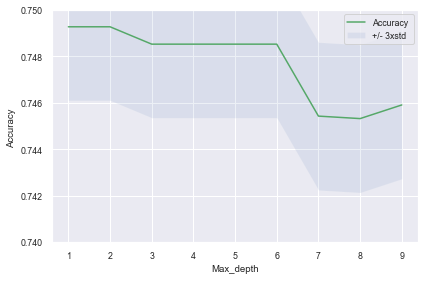

In [43]:
plt.plot(range(1,md),mean_acc,'g')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_depth')
plt.ylim([0.74, 0.750])
plt.tight_layout()
plt.show()


In [44]:
print( "The best accuracy was with", mean_acc.max(), "with max_depth=", mean_acc.argmax()+1) 


The best accuracy was with 0.7492789231919667 with max_depth= 1


[Text(653.6571428571428, 403.81714285714287, 'Y <= 0.177\nentropy = 0.811\nsamples = 74886\nvalue = [56178, 18708]'),
 Text(621.7714285714285, 341.69142857142856, 'X <= -0.124\nentropy = 0.916\nsamples = 56525\nvalue = [37817, 18708]'),
 Text(414.5142857142857, 279.5657142857143, 'Snowing <= 7.947\nentropy = 1.0\nsamples = 36723\nvalue = [18365, 18358]'),
 Text(255.08571428571426, 217.44, 'Y <= 0.139\nentropy = 1.0\nsamples = 36577\nvalue = [18299, 18278]'),
 Text(127.54285714285713, 155.3142857142857, 'Y <= 0.138\nentropy = 1.0\nsamples = 34820\nvalue = [17441, 17379]'),
 Text(63.771428571428565, 93.18857142857144, 'X <= -0.145\nentropy = 1.0\nsamples = 34807\nvalue = [17432, 17375]'),
 Text(31.885714285714283, 31.062857142857126, 'entropy = 1.0\nsamples = 1314\nvalue = [640, 674]'),
 Text(95.65714285714284, 31.062857142857126, 'entropy = 1.0\nsamples = 33493\nvalue = [16792, 16701]'),
 Text(191.3142857142857, 93.18857142857144, 'X <= -0.142\nentropy = 0.89\nsamples = 13\nvalue = [9, 

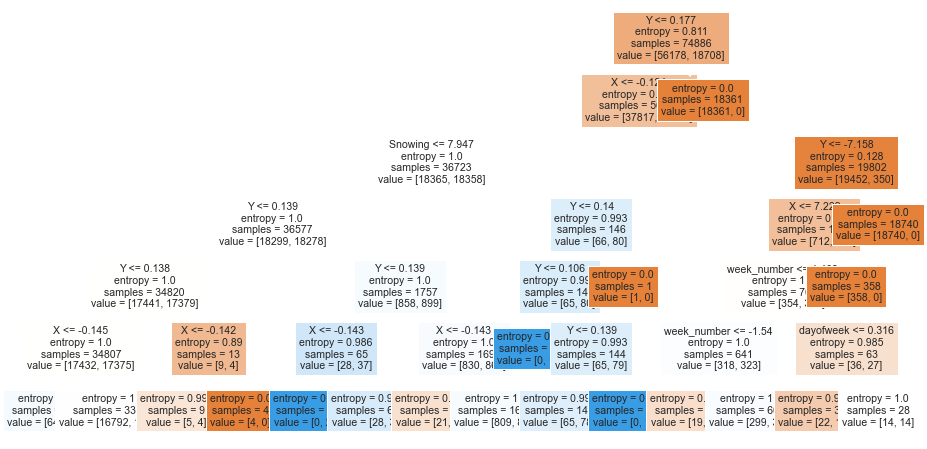

In [45]:

DT = DecisionTreeClassifier(criterion="entropy", max_depth = 6)  
DT.fit(X_train,y_train)
DT_yhat = DT.predict(X_test)

#Visualize
fig_dt = plt.figure(figsize=(16,8))
ax_dt = fig_dt.add_subplot(1,1,1)

tree.plot_tree(DT, fontsize=10.5, ax = ax_dt, feature_names = ['X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk'], filled = True)


#### Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_depth=30, n_estimators=30, random_state=42)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)

accuracy_RF = accuracy_score(y_test, RF_pred)
print('Accuracy: {}'.format(accuracy_RF))


Accuracy: 0.7158423245379767


#### K Nearest Neighbor(KNN)

In [47]:
from sklearn.neighbors import KNeighborsClassifier

y.astype(np.integer)  # this may work or cause problem
Ks = 10
kmean_acc = np.zeros((Ks-1))
kstd_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    knn_yhat=knn.predict(X_test)
    kmean_acc[n-1] = metrics.accuracy_score(y_test, knn_yhat)
    
    kstd_acc[n-1]=np.std(knn_yhat==y_test)/np.sqrt(knn_yhat.shape[0])

kmean_acc


array([0.6423459 , 0.70964641, 0.64902254, 0.69559876, 0.65655379,
       0.6945305 , 0.66419186, 0.6990172 , 0.67775879])

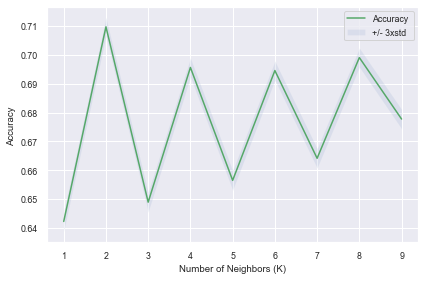

In [48]:
plt.plot(range(1,Ks),kmean_acc,'g')
plt.fill_between(range(1,Ks),kmean_acc - 1 * kstd_acc,kmean_acc + 1 * kstd_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()


In [49]:
print( "The best accuracy was with", kmean_acc.max(), "with k=", kmean_acc.argmax()+1)


The best accuracy was with 0.7096464052985793 with k= 2


In [50]:
k = (kmean_acc.argmax()+1)
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train,y_train)
yhat_k = knn.predict(X_test)


#### Support Vector Machine

In [51]:
import scipy.optimize as opt
from sklearn import svm

#Train & test with kernel= poly, sigmoid, linear, rbf

#Train
svm_pl = svm.SVC(kernel='poly')
svm_pl.fit(X_train, y_train) 
#Test
predSvm_pl = svm_pl.predict(X_test)
#Score
poly = metrics.accuracy_score(y_test, predSvm_pl)
print("Test set Accuracy with kernel=poly: ", poly)

#Train
svm_sg = svm.SVC(kernel='sigmoid')
svm_sg.fit(X_train, y_train) 
#Test
predSvm_sg = svm_sg.predict(X_test)
#Score
sg = metrics.accuracy_score(y_test, predSvm_sg)
print("Test set Accuracy with kernel=sigmoid: ", sg)

#Train
svm_ln = svm.SVC(kernel='linear')
svm_ln.fit(X_train, y_train) 
#Test
predSvm_ln = svm_ln.predict(X_test)
#Score
ln = metrics.accuracy_score(y_test, predSvm_ln)
print("Test set Accuracy with kernel=linear: ", ln)

#Train
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train) 
#Test
predSvm_rbf = svm_rbf.predict(X_test)
#Score
rbf = metrics.accuracy_score(y_test, predSvm_rbf)

print("Test set Accuracy with kernel=rbf: ", rbf)


Test set Accuracy with kernel=poly:  0.7491186839012925
Test set Accuracy with kernel=sigmoid:  0.6299540647366735
Test set Accuracy with kernel=linear:  0.7492789231919667
Test set Accuracy with kernel=rbf:  0.7492789231919667


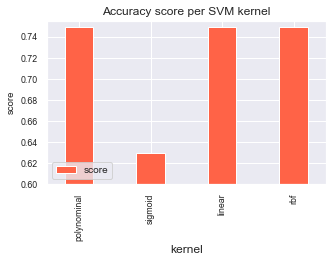

In [79]:
accuracy = [poly, sg, ln, rbf]

svm_score = pd.DataFrame(accuracy, index=['polynominal','sigmoid','linear','rbf'])
svm_score.columns = ['score']
svm_score.columns.name = 'kernel'


svm_score.plot(kind='bar', figsize=(5, 3), width=0.4, color='tomato')
plt.ylim([0.6,0.755])
plt.xlabel('kernel') 
plt.ylabel('score') 
plt.title('Accuracy score per SVM kernel', fontsize=12) 
plt.legend(loc='lower left', fontsize=10)

plt.show()


Kernel = linear and RBF marked the highest. Since RBF performs well with high-dimension data, I am going to apply **RBF**.

#### Gaussian Naive Bayes

In [53]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()    # define GNB
gnb.fit(X_train, y_train)    
predGNB = gnb.predict(X_test)    

In [54]:
acc_gnb = metrics.accuracy_score(y_test, predGNB)
acc_gnb

0.7439910265997223

#### Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

#Train
lr = LogisticRegression(C=0.01, solver='liblinear')
lr.fit(X_train, y_train) 
#Test
predLr = lr.predict_proba(X_test)


In [56]:
from sklearn.metrics import log_loss
lracc = log_loss(y_test, predLr)

print("Test set Accuracy = ", lracc)


Test set Accuracy =  0.5562570757235854


#### Summary of Accuracy:

In [81]:
results = [mean_acc.max(), accuracy_RF, kmean_acc.max(), rbf, acc_gnb, lracc]

Rp = pd.DataFrame(results,index=['decision tree','random forest','knn','svm','GNB','Logistic Regression'])
Rp.columns = ['Accuracy Score']
Rp.columns.name = 'Algorithm'
Rp

Algorithm,Accuracy Score
decision tree,0.75
random forest,0.72
knn,0.71
svm,0.75
GNB,0.74
Logistic Regression,0.56


In [ ]:
All classifier models mark but logistic regression 

#### Evaluation with test set

In [58]:
#Preparing test set
#Feature
TSFeature = TS[['X', 'Y', 'dayofweek', 'weekend', 'week_number', 'year', 'Clear', 'Overcast', 'Raining', 'Snowing', 'Dry', 'Ice', 'Snow/Slush', 'Wet', 'Dark - Street Lights On', 'Dawn', 'Daylight', 'Dusk']]
XTS = TSFeature
#Normalize
XTS = preprocessing.StandardScaler().fit(XTS).transform(XTS)
XTS

array([[-0.09490255,  0.06707517,  0.54371084, ..., -0.10721125,
         1.11278321, -0.16439899],
       [-0.09263376,  0.05334014,  1.57558886, ..., -0.10721125,
         1.11278321, -0.16439899],
       [-0.09861301,  0.09261424,  0.54371084, ..., -0.10721125,
         1.11278321, -0.16439899],
       ...,
       [-0.13204168,  0.22395514, -1.00410618, ..., -0.10721125,
        -0.89864763, -0.16439899],
       [-0.13053424,  0.22626057,  0.02777184, ..., -0.10721125,
        -0.89864763, -0.16439899],
       [-0.13532523,  0.23330393,  1.57558886, ..., -0.10721125,
        -0.89864763, -0.16439899]])

In [59]:
test_y=(pd.get_dummies(TS['Crash'])[1].values).astype(float)
test_y[5000:5010]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Results and Evaluation

In [60]:
from sklearn.metrics import classification_report
DT_yhat = DT.predict(XTS)
RF_pred = RF.predict(XTS)
yhat_k = knn.predict(XTS)
predSvm = svm_rbf.predict(XTS)
predLr = lr.predict_proba(XTS)
predGNB = gnb.predict(XTS)


In [99]:
#DT
rep = classification_report(test_y, DT_yhat, output_dict=True)
target_names = ['decison tree00','01']
print(classification_report(test_y, DT_yhat, labels = np.arange(len(target_names)),target_names=target_names))

                precision    recall  f1-score   support

decison tree00       0.75      1.00      0.86      5016
            01       0.00      0.00      0.00      1672

      accuracy                           0.75      6688
     macro avg       0.38      0.50      0.43      6688
  weighted avg       0.56      0.75      0.64      6688



In [101]:
#RF
rep = classification_report(test_y, RF_pred, output_dict=True)
target_names = ['random forest00','01']
print(classification_report(test_y, RF_pred, labels = np.arange(len(target_names)),target_names=target_names))

                 precision    recall  f1-score   support

random forest00       0.75      1.00      0.86      5016
             01       0.00      0.00      0.00      1672

       accuracy                           0.75      6688
      macro avg       0.38      0.50      0.43      6688
   weighted avg       0.56      0.75      0.64      6688



In [102]:
#KNN
rep = classification_report(test_y, yhat_k, output_dict=True)
target_names = ['knn00','01']
print(classification_report(test_y, yhat_k, labels = np.arange(len(target_names)),target_names=target_names))

              precision    recall  f1-score   support

       knn00       0.75      1.00      0.86      5016
          01       0.00      0.00      0.00      1672

    accuracy                           0.75      6688
   macro avg       0.37      0.50      0.43      6688
weighted avg       0.56      0.75      0.64      6688



In [103]:
#SVM
rep = classification_report(test_y, predSvm, output_dict=True)
target_names = ['svm00','01']
print(classification_report(test_y, predSvm, labels = np.arange(len(target_names)),target_names=target_names))

              precision    recall  f1-score   support

       svm00       0.75      1.00      0.86      5016
          01       0.00      0.00      0.00      1672

    accuracy                           0.75      6688
   macro avg       0.38      0.50      0.43      6688
weighted avg       0.56      0.75      0.64      6688



In [96]:
#GNB
rep = classification_report(test_y, predGNB, output_dict=True)
target_names = ['gnb','gnb']

print(classification_report(test_y, predGNB, labels = np.arange(len(target_names)),target_names=target_names))

              precision    recall  f1-score   support

         gnb       0.75      0.98      0.85      5016
         gnb       0.25      0.02      0.03      1672

    accuracy                           0.74      6688
   macro avg       0.50      0.50      0.44      6688
weighted avg       0.62      0.74      0.65      6688



In [106]:
rep_lr = log_loss(test_y, predLr)
print("log_loss accuracy of logistic regresiion: ",rep_lr)

log_loss accuracy of logistic regresiion:  0.5524439358506722


Again, below is the evaluation at Train phase

In [68]:
results = [mean_acc.max(), accuracy_RF, kmean_acc.max(), rbf, acc_gnb, lracc]

Rp = pd.DataFrame(results,index=['decision tree','random forest','knn','svm','gnb','log reg'])
Rp.columns = ['(Training) Score']
Rp.columns.name = 'Algorithm'
Rp

Algorithm,(Training) Score
decision tree,0.75
random forest,0.72
knn,0.71
svm,0.75
gnb,0.74
log reg,0.56


## Discussion

As seen above, most classfiers have marked close accuracy above 71% at the training phase, and likewise at the test phase with Gaussian Naive Bayes showing a slight difference. I believe the results are fairly good as the first step. 

I also believe the results could be improved output could offer so much more with the following:
1. by applying the real and accurate negative samples
2. by mapping with other collision detail datasets, such as WSP records
3. by incorporating dynamic geospatial and weather data

(Reasons / how regarding 1-3) And improve modeling




In [ ]:
!pip install folium --upgrade
import folium
from branca.element import Figure
from folium.plugins import HeatMapWithTime
from folium import plugins
from branca.element import CssLink, Element, Figure, JavascriptLink
from folium.plugins import HeatMapWithTime

In [129]:
geo_weekdays = TS[TS.weekend == 0]  #Weekdays
geo_weekends = TS[TS.weekend == 1]  #Weekends


#Weekdays: 
lat_long_listD = []
for i in range(1,25):
    temp=[]
    for index, instance in geo_weekdays[geo_weekdays['hour'] == i].iterrows():
        temp.append([instance['Y'],instance['X']])
    lat_long_listD.append(temp)
    
    
mapWD = folium.Map(location=[47.60621, -122.33207], zoom_start=12)   #Base map

fig_D=Figure(width=850,height=850)
fig_D.add_child(mapWD)

fig_D.header.add_child(
    JavascriptLink('https://rawcdn.githack.com/nezasa/iso8601-js-period/master/iso8601.min.js'),
    name='iso8601')

plugins.HeatMapWithTime(lat_long_listD,radius=8,auto_play=True,position='bottomright').add_to(mapWD)

# Save as html, in case this doesn't render in GitHub, to embed 
outfp = "/Users/mizukitoriya/Downloads/mapWD.html"
mapWD.save(outfp)

mapWD

In [ ]:
#in case above does not render at GitHub or wherever this is being viewed.
HTML("mapWD.html")

## Conclusion and Future Direction

#continued from discussion... <br>
<br>
Once we have run sufficient training and testing, we can put this into practice, for example, developing a prediction app. I have put the SDOT test data into HeatMapWithTime geo maps in a way to display hourly collision occurence. It is an example of visualizing the practice so people can see when and where crashes are likely to occur. 

### References

### Acknowledgement

### Appendix

There are really two distinct parts of the inputs: the static features and the dynamic features.
The static features are the parts of the input data that, for the most part, do not change with time. This includes features derived from the road geometry, such as curvature or other properties, such as speed limit or population density. Of course, these aren’t static per say, but they are slowly changing so we can treat them as constant for all intents and purposes.
The dynamic features change depending on when we are making the prediction. These are the weather feeds, solar geometry, and time variables (hour, month, day, etc).

WSP data

mention TSP
